In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
P = np.array([[0.6,0.2],[0.4,0.8]])

In [3]:
Pn = np.linalg.matrix_power(P, 1)

In [4]:
print(Pn)

[[0.6 0.2]
 [0.4 0.8]]


In [5]:
print(np.dot(Pn,[1,0]))

[0.6 0.4]


$$  A = UDU^{-1}  $$

esto tiene la propiedad 

$$  A^{n} = UD^{n}U^{-1}  $$

In [6]:
values, vectors = np.linalg.eig(P)
print(values)
print(vectors)

[0.4 1. ]
[[-0.70710678 -0.4472136 ]
 [ 0.70710678 -0.89442719]]


In [7]:
MValues = np.zeros((2,2))
MValues[0,0] = values[0]
MValues[1,1] = values[1]
print(MValues)

[[0.4 0. ]
 [0.  1. ]]


In [8]:
def GetProbs(M,vectors,S0,nsteps):
    
    MValuesn = np.linalg.matrix_power(MValues, nsteps)
    tmp = np.dot(vectors,MValuesn)
    D = np.dot(tmp,np.linalg.inv(vectors))
    
    S = np.dot(D,S0)
    
    return S

In [9]:
S = GetProbs(MValues,vectors,[1,0],1)

In [10]:
print(S)

[0.6 0.4]


In [11]:
def GetTracks(S0,Steps = 100):
    
    x = np.linspace(0,Steps,Steps+1)

    FinalStates = np.zeros((len(x),2))

    for i in range(len(x)):
        FinalStates[i] = GetProbs(MValues,vectors,S0,i)
        
    return FinalStates

In [12]:
States = np.array([[1,0],[0,1],[0.3,0.7]])

[0.34016 0.65984]
[0.32992 0.67008]
[0.332992 0.667008]


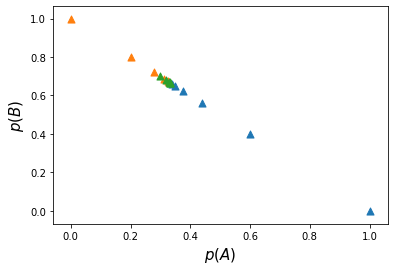

In [13]:
for s in States:
    FinalStates = GetTracks(s,5)
    print(FinalStates[-1])
    plt.scatter(FinalStates[:,0],FinalStates[:,1],marker='^',s=50)
    plt.xlabel(r'$p(A)$',fontsize=15)
    plt.ylabel(r'$p(B)$',fontsize=15)